In [1]:
# Trabajo final de Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from cycler import cycler

In [2]:
#Funcion lambda para la trnasformacion de los timestamps en fechas
changeToDate = lambda x: datetime.datetime.utcfromtimestamp(x).strftime("%Y-%m-%d")
changeToDatetime = lambda x: datetime.datetime.utcfromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S")

In [3]:
# Abrir archivos nombrar columnas, se elimina la ultima que no se utiliza y se agraga la moneda para diferenciar
# Cargando archivo hitbtcUSD
hitbtc = pd.read_csv("hitbtcUSD.csv", names=["Fecha", "PrecioHITBTC", "Monto"])
hitbtc = hitbtc.drop("Monto", 1) 

# Duplicamos Hora para que sort obtenga el ultimo valor del dia
hitbtc["Fecha-Hora"] = hitbtc["Fecha"]

# Se le da formato a las fechas
hitbtc["Fecha"]=hitbtc["Fecha"].apply(changeToDate)
hitbtc["Fecha-Hora"]=hitbtc["Fecha-Hora"].apply(changeToDatetime)

# Se hace el sort y se obtiene unicamente el ultimo registro del dia
dfhitbtc = hitbtc.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).last()

# Elimanacion columna que unicamente fue usada para el sort
dfhitbtc = dfhitbtc.drop("Fecha-Hora", 1)

In [4]:
# Seleccionando periodo de dataframe 365 dias Euros
dfhitbtc = dfhitbtc[(dfhitbtc['Fecha'] > '2014-10-10') & (dfhitbtc['Fecha'] <= '2015-10-10')]

dfhitbtc = dfhitbtc.set_index("Fecha")
dfhitbtc.head(10)


,PrecioHITBTC
Fecha,
2014-10-11,365.25
2014-10-12,381.40
2014-10-13,391.29
2014-10-14,398.24
2014-10-15,391.66
2014-10-16,383.25
2014-10-17,384.30
2014-10-18,391.79
2014-10-19,390.13


In [5]:
# itbitUSD
itbit = pd.read_csv("itbitUSD.csv", names=["Fecha", "PrecioITBIT", "Monto"])
itbit = itbit.drop("Monto", 1)

itbit["Fecha-Hora"] = itbit["Fecha"]

itbit["Fecha"]=itbit["Fecha"].apply(changeToDate)
itbit["Fecha-Hora"]=itbit["Fecha-Hora"].apply(changeToDatetime)

dfitbit = itbit.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).last()

dfitbit = dfitbit.drop("Fecha-Hora", 1)


In [6]:
# Seleccionando periodo de dataframe 365 dias 
dfitbit = dfitbit[(dfitbit['Fecha'] > '2014-10-10') & (dfitbit['Fecha'] <= '2015-10-10')]
dfitbit = dfitbit.set_index("Fecha")
#dfitbit.to_csv("itbitUSDsalida.csv")
dfitbit.head(10)

,PrecioITBIT
Fecha,
2014-10-11,361.27
2014-10-12,372.03
2014-10-13,383.35
2014-10-14,397.94
2014-10-15,393.46
2014-10-16,379.29
2014-10-17,380.25
2014-10-18,390.00
2014-10-19,386.25


In [7]:
# localbtcUSD
localbtc = pd.read_csv("localbtcUSD.csv", names=["Fecha", "PrecioLOCALBTC", "Monto"])
localbtc = localbtc.drop("Monto", 1)

localbtc["Fecha-Hora"] = localbtc["Fecha"]

localbtc["Fecha"]=localbtc["Fecha"].apply(changeToDate)
localbtc["Fecha-Hora"]=localbtc["Fecha-Hora"].apply(changeToDatetime)

dflocalbtc = localbtc.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).last()
dflocalbtc = dflocalbtc.drop("Fecha-Hora", 1)

In [8]:
# Seleccionando periodo de dataframe 365 dias 
dflocalbtc = dflocalbtc[(dflocalbtc['Fecha'] > '2014-10-10') & (dflocalbtc['Fecha'] <= '2015-10-10')]
dflocalbtc = dflocalbtc.set_index("Fecha")
dflocalbtc.to_csv("dflocalbtcsalida.csv")
dflocalbtc.head(10)

,PrecioLOCALBTC
Fecha,
2014-10-11,380.76
2014-10-12,650.03
2014-10-13,489.81
2014-10-14,390.51
2014-10-15,416.39
2014-10-16,475.29
2014-10-17,554.02
2014-10-18,401.02
2014-10-19,543.77


In [9]:
# No se efectuo Merge de Archivos. se adicionaron columnas al DataFrame
dfFIN = dfhitbtc
dfFIN["PrecioITBIT"] = dfitbit["PrecioITBIT"]
dfFIN["PrecioLOCALBTC"] = dflocalbtc["PrecioLOCALBTC"]
#dfFIN.to_csv("final.csv")
dfFIN.head(10)

,PrecioHITBTC,PrecioITBIT,PrecioLOCALBTC
Fecha,,,
2014-10-11,365.25,361.27,380.76
2014-10-12,381.40,372.03,650.03
2014-10-13,391.29,383.35,489.81
2014-10-14,398.24,397.94,390.51
2014-10-15,391.66,393.46,416.39
2014-10-16,383.25,379.29,475.29
2014-10-17,384.30,380.25,554.02
2014-10-18,391.79,390.00,401.02
2014-10-19,390.13,386.25,543.77


In [10]:
# Procesamiento 
# calculo de las fechas con mayor y menor precio de cotizacion.
# Maximo
HITBRCsort = dfFIN.sort_values(["PrecioHITBTC"], ascending=False)
HITBRCmax = HITBRCsort.head(1)
HITBRCmin = HITBRCsort.tail(1)
ITBITsort = dfFIN.sort_values(["PrecioITBIT"], ascending=False)
ITBITmax = ITBITsort.head(1)
ITBITmin = ITBITsort.tail(1)
LOCALBTCsort = dfFIN.sort_values(["PrecioLOCALBTC"], ascending=False)
LOCALBTCmax = LOCALBTCsort.head(1)
LOCALBTCmin = LOCALBTCsort.tail(1)

print "Maximo Exchange HITBRC"
print HITBRCmax["PrecioHITBTC"]

print "\nMaximo Exchange ITBIT"
print ITBITmax["PrecioITBIT"]

print "\nMaximo Exchage LOCALBT"
print LOCALBTCmax["PrecioLOCALBTC"]

Maximo Exchange HITBRC
Fecha
2014-11-12    423.1
Name: PrecioHITBTC, dtype: float64

Maximo Exchange ITBIT
Fecha
2014-11-13    419.42
Name: PrecioITBIT, dtype: float64

Maximo Exchage LOCALBT
Fecha
2014-10-22    699.99
Name: PrecioLOCALBTC, dtype: float64


In [11]:
# Minimo
print "Minimo Exchange HITBRC"
print HITBRCmin["PrecioHITBTC"]

print "\nMinimo Exchange ITBIT"
print ITBITmin["PrecioITBIT"]

print "\nMinimo Exchage LOCALBT"
print LOCALBTCmin["PrecioLOCALBTC"]

Minimo Exchange HITBRC
Fecha
2015-01-14    186.76
Name: PrecioHITBTC, dtype: float64

Minimo Exchange ITBIT
Fecha
2015-01-14    183.16
Name: PrecioITBIT, dtype: float64

Minimo Exchage LOCALBT
Fecha
2015-09-30    203.0
Name: PrecioLOCALBTC, dtype: float64


In [12]:
# Calculo de Rollin Mean, Se hace por moneda
Data_RM = dfFIN.rolling(window=30).mean()
Data_RM= Data_RM.dropna()

In [13]:
Data_RM.head(10)

,PrecioHITBTC,PrecioITBIT,PrecioLOCALBTC
Fecha,,,
2014-11-09,360.559000,358.199377,455.285667
2014-11-10,360.384333,358.422710,458.512000
2014-11-11,359.828667,358.255043,453.413333
2014-11-12,360.889000,359.405710,454.156000
2014-11-13,361.581000,360.121710,457.111000
2014-11-14,361.780000,360.308610,457.168667
2014-11-15,361.481333,360.182610,456.942000
2014-11-16,361.478667,360.447943,453.674333
2014-11-17,361.351667,360.366610,458.450667


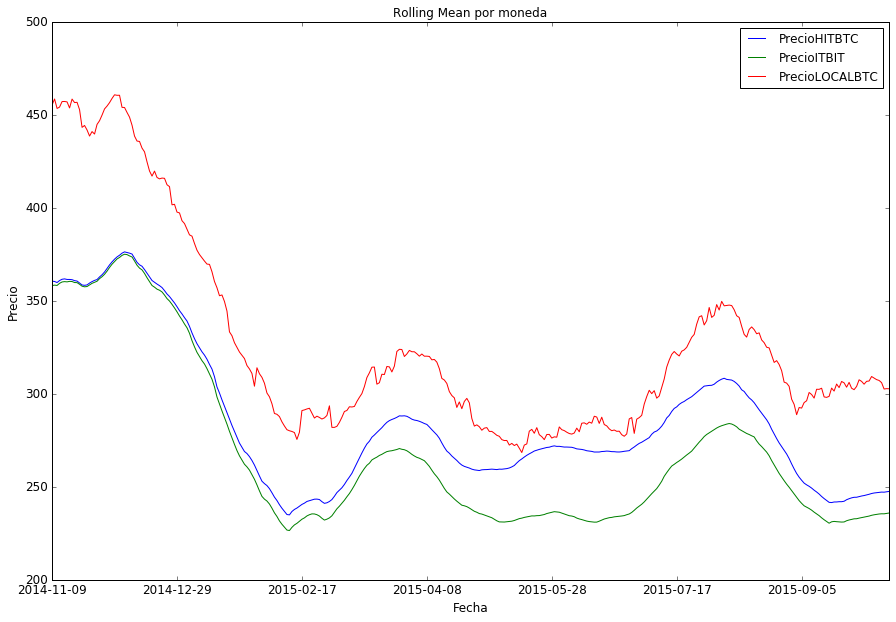

In [14]:
# Graficamos Rolling Mean, de cada moneda
%matplotlib inline

ax = Data_RM[["PrecioHITBTC","PrecioITBIT","PrecioLOCALBTC"]].plot(kind="line", title ="Rolling Mean por moneda",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
ax.set_ylabel("Precio",fontsize=12)
plt.show()

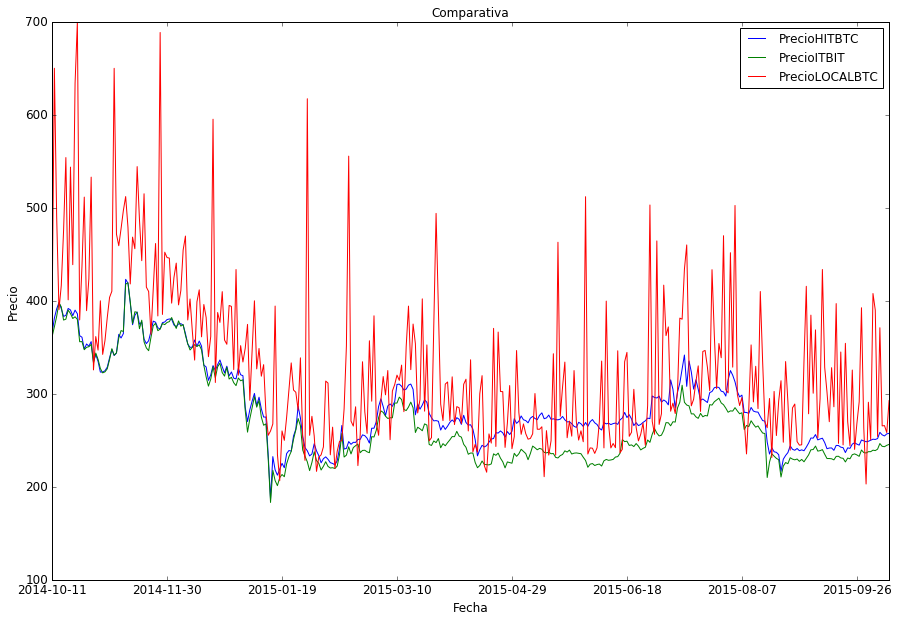

In [15]:
# Grafica del comportamiento de cada mercado
ax = dfFIN[["PrecioHITBTC","PrecioITBIT","PrecioLOCALBTC"]].plot(kind="line", title ="Comparativa",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
ax.set_ylabel("Precio",fontsize=12)
plt.show()

In [16]:
# OBtengo Spread de los diferentes Mercados
dfFIN["HITBTC-ITBIT"] = dfFIN.PrecioHITBTC - dfFIN.PrecioITBIT

In [17]:
dfFIN["HITBTC-LOCALBTC"] = dfFIN.PrecioHITBTC - dfFIN.PrecioLOCALBTC

In [18]:
dfFIN["LOCALBTC-ITBIT"] = dfFIN.PrecioLOCALBTC - dfFIN.PrecioITBIT

In [19]:
dfFIN.head(10)

,PrecioHITBTC,PrecioITBIT,PrecioLOCALBTC,HITBTC-ITBIT,HITBTC-LOCALBTC,LOCALBTC-ITBIT
Fecha,,,,,,
2014-10-11,365.25,361.27,380.76,3.98,-15.51,19.49
2014-10-12,381.40,372.03,650.03,9.37,-268.63,278.00
2014-10-13,391.29,383.35,489.81,7.94,-98.52,106.46
2014-10-14,398.24,397.94,390.51,0.30,7.73,-7.43
2014-10-15,391.66,393.46,416.39,-1.80,-24.73,22.93
2014-10-16,383.25,379.29,475.29,3.96,-92.04,96.00
2014-10-17,384.30,380.25,554.02,4.05,-169.72,173.77
2014-10-18,391.79,390.00,401.02,1.79,-9.23,11.02
2014-10-19,390.13,386.25,543.77,3.88,-153.64,157.52


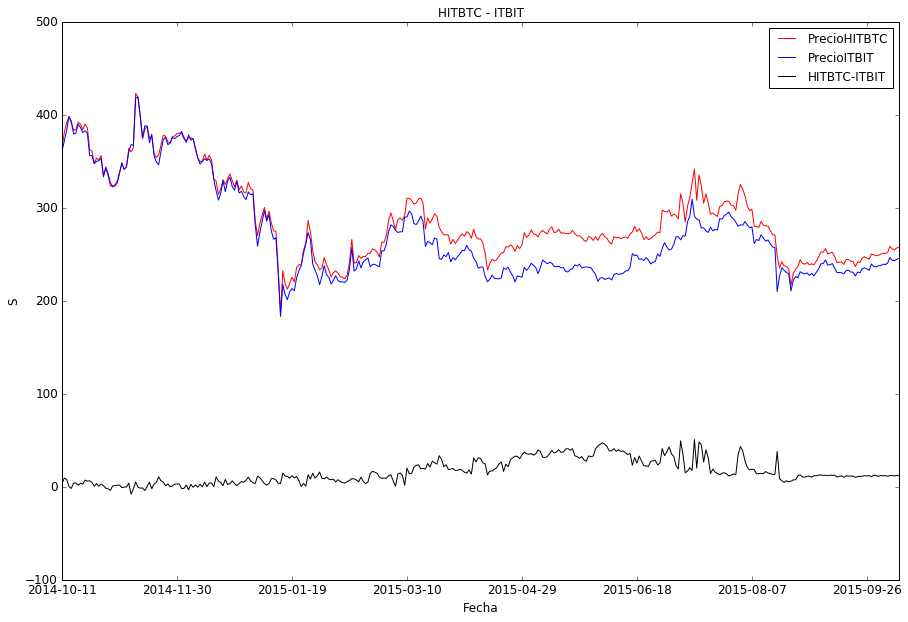

In [20]:
# Graficar los Spread, comparativos (Se indica el precio de los mercados y el spreed entre ellos )
ax = dfFIN[['PrecioHITBTC','PrecioITBIT','HITBTC-ITBIT']].plot(kind='line', title ="HITBTC - ITBIT", color=["red","blue","black"], figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
ax.set_ylabel("S",fontsize=12)
plt.show()

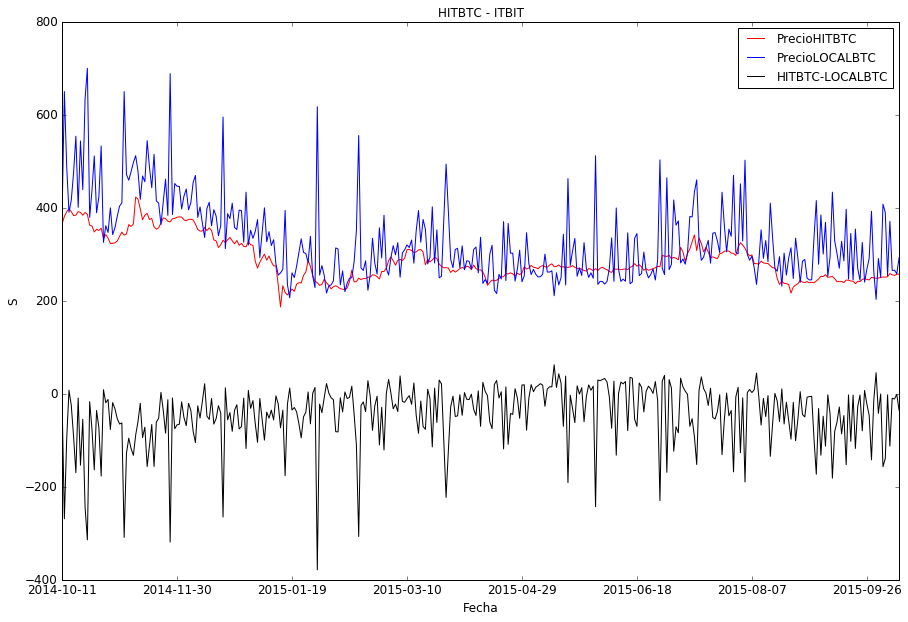

In [21]:
# Graficar los Spread, comparativos (Se indica el precio de los mercados y el spreed entre ellos )
ax = dfFIN[['PrecioHITBTC','PrecioLOCALBTC','HITBTC-LOCALBTC']].plot(kind='line', title ="HITBTC - ITBIT", color=["red","blue","black"], figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
ax.set_ylabel("S",fontsize=12)
plt.show()

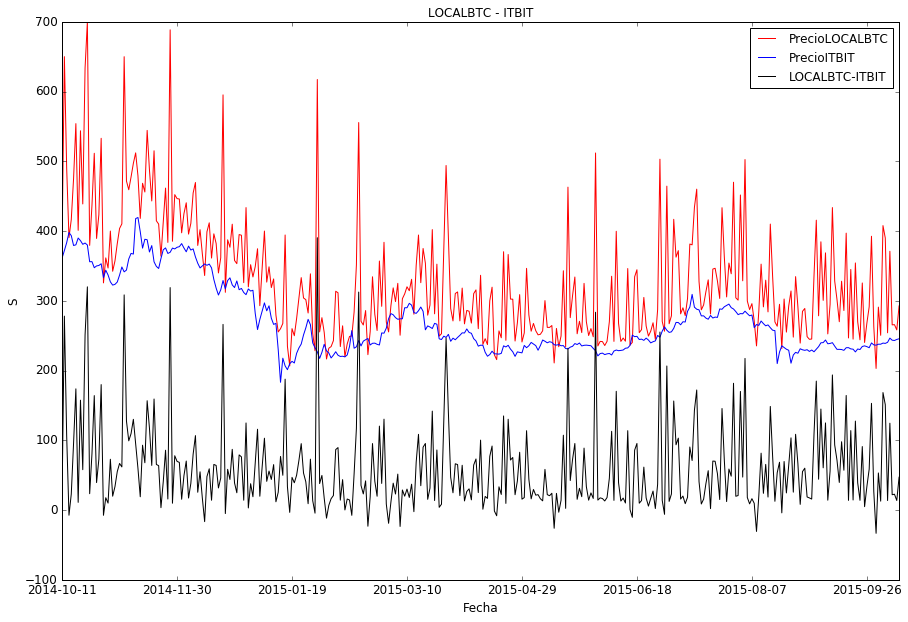

In [22]:
# Graficar los Spread, comparativos (Se indica el precio de los mercados y el spreed entre ellos )
ax = dfFIN[['PrecioLOCALBTC','PrecioITBIT','LOCALBTC-ITBIT']].plot(kind='line', title ="LOCALBTC - ITBIT", color=["red","blue","black"], figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
ax.set_ylabel("S",fontsize=12)
plt.show()

In [23]:
# Adicional al ejercicio y para ver el spreed Diario de cada mercado (cambio diario)
# Primero hacemos drop de las columnas Spread
dfFIN = dfFIN.drop("HITBTC-ITBIT", 1)
dfFIN = dfFIN.drop("HITBTC-LOCALBTC", 1)
dfFIN = dfFIN.drop("LOCALBTC-ITBIT", 1)

In [24]:
# OBtengo Spread de los diferentes Grupos, Valor Maximo y Minimo Euros
hitbtc = hitbtc[(hitbtc['Fecha'] > '2014-10-10') & (hitbtc['Fecha'] <= '2015-10-10')]
dfhitbtcmax = hitbtc.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).max()
dfhitbtcmin = (hitbtc.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).min())

In [25]:
dfhitbtcSP = dfFIN
dfhitbtcmax = dfhitbtcmax.set_index("Fecha")
dfhitbtcmin = dfhitbtcmin.set_index("Fecha")

In [26]:
dfhitbtcSP["PrecioMax"] = dfhitbtcmax["PrecioHITBTC"]
dfhitbtcSP["PrecioMin"] = dfhitbtcmin["PrecioHITBTC"]
dfFIN["spreadHITBTC"]= dfhitbtcSP.PrecioMax - dfhitbtcSP.PrecioMin
dfFIN.head(10)

,PrecioHITBTC,PrecioITBIT,PrecioLOCALBTC,PrecioMax,PrecioMin,spreadHITBTC
Fecha,,,,,,
2014-10-11,365.25,361.27,380.76,370.45,356.46,13.99
2014-10-12,381.40,372.03,650.03,383.08,357.07,26.01
2014-10-13,391.29,383.35,489.81,400.46,369.68,30.78
2014-10-14,398.24,397.94,390.51,412.23,392.77,19.46
2014-10-15,391.66,393.46,416.39,400.45,386.29,14.16
2014-10-16,383.25,379.29,475.29,397.84,370.85,26.99
2014-10-17,384.30,380.25,554.02,385.86,373.66,12.20
2014-10-18,391.79,390.00,401.02,394.17,378.02,16.15
2014-10-19,390.13,386.25,543.77,393.36,385.13,8.23


In [27]:
# OBtengo Spread de los diferentes Grupos, Valor Maximo y Minimo Dolares
itbit = itbit[(itbit['Fecha'] > '2014-10-10') & (itbit['Fecha'] <= '2015-10-10')]
dfitbitmax = itbit.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).max()
dfitbitmin = (itbit.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).min())

In [28]:
dfitbitSP = dfFIN
dfitbitmax = dfitbitmax.set_index("Fecha")
dfitbitmin = dfitbitmin.set_index("Fecha")

In [29]:
dfitbitSP["PrecioMax"] = dfitbitmax["PrecioITBIT"]
dfitbitSP["PrecioMin"] = dfitbitmin["PrecioITBIT"]
dfFIN["SpreadITBIT"]= dfitbitSP.PrecioMax - dfitbitSP.PrecioMin
dfFIN.head(10)

,PrecioHITBTC,PrecioITBIT,PrecioLOCALBTC,PrecioMax,PrecioMin,spreadHITBTC,SpreadITBIT
Fecha,,,,,,,
2014-10-11,365.25,361.27,380.76,366.00,352.25,13.99,13.75
2014-10-12,381.40,372.03,650.03,375.00,354.29,26.01,20.71
2014-10-13,391.29,383.35,489.81,391.03,363.29,30.78,27.74
2014-10-14,398.24,397.94,390.51,405.80,385.93,19.46,19.87
2014-10-15,391.66,393.46,416.39,397.90,379.28,14.16,18.62
2014-10-16,383.25,379.29,475.29,395.00,372.19,26.99,22.81
2014-10-17,384.30,380.25,554.02,385.71,371.91,12.20,13.80
2014-10-18,391.79,390.00,401.02,391.75,377.04,16.15,14.71
2014-10-19,390.13,386.25,543.77,389.10,384.28,8.23,4.82


In [30]:
# OBtengo Spread de los diferentes Grupos, Valor Maximo y Minimo 
localbtc = localbtc[(localbtc['Fecha'] > '2014-10-10') & (localbtc['Fecha'] <= '2015-10-10')]
dflocalbtcmax = localbtc.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).max()
dflocalbtcmin = (localbtc.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).min())

In [31]:
dflocalbtcSP = dfFIN
dflocalbtcmax = dflocalbtcmax.set_index("Fecha")
dflocalbtcmin = dflocalbtcmin.set_index("Fecha")

In [32]:
dflocalbtcSP["PrecioMax"] = dflocalbtcmax["PrecioLOCALBTC"]
dflocalbtcSP["PrecioMin"] = dflocalbtcmin["PrecioLOCALBTC"]
dfFIN["SpreadLOCALBTC"]= dflocalbtcSP.PrecioMax - dflocalbtcSP.PrecioMin
dfFIN.head(10)

,PrecioHITBTC,PrecioITBIT,PrecioLOCALBTC,PrecioMax,PrecioMin,spreadHITBTC,SpreadITBIT,SpreadLOCALBTC
Fecha,,,,,,,,
2014-10-11,365.25,361.27,380.76,1075.15,251.89,13.99,13.75,823.26
2014-10-12,381.40,372.03,650.03,887.57,297.91,26.01,20.71,589.66
2014-10-13,391.29,383.35,489.81,892.86,315.26,30.78,27.74,577.60
2014-10-14,398.24,397.94,390.51,948.77,283.55,19.46,19.87,665.22
2014-10-15,391.66,393.46,416.39,755.81,348.64,14.16,18.62,407.17
2014-10-16,383.25,379.29,475.29,1000.00,339.60,26.99,22.81,660.40
2014-10-17,384.30,380.25,554.02,819.96,302.29,12.20,13.80,517.67
2014-10-18,391.79,390.00,401.02,1082.25,360.96,16.15,14.71,721.29
2014-10-19,390.13,386.25,543.77,973.71,334.76,8.23,4.82,638.95


In [33]:
# Se agregaron 2 columnas a DFFIN, se les da DROP
dfFIN = dfFIN.drop("PrecioMax", 1)
dfFIN = dfFIN.drop("PrecioMin", 1)
dfFIN.head(10)

,PrecioHITBTC,PrecioITBIT,PrecioLOCALBTC,spreadHITBTC,SpreadITBIT,SpreadLOCALBTC
Fecha,,,,,,
2014-10-11,365.25,361.27,380.76,13.99,13.75,823.26
2014-10-12,381.40,372.03,650.03,26.01,20.71,589.66
2014-10-13,391.29,383.35,489.81,30.78,27.74,577.60
2014-10-14,398.24,397.94,390.51,19.46,19.87,665.22
2014-10-15,391.66,393.46,416.39,14.16,18.62,407.17
2014-10-16,383.25,379.29,475.29,26.99,22.81,660.40
2014-10-17,384.30,380.25,554.02,12.20,13.80,517.67
2014-10-18,391.79,390.00,401.02,16.15,14.71,721.29
2014-10-19,390.13,386.25,543.77,8.23,4.82,638.95


In [34]:
# Obtiene valor maximo Spread HITBTC
FechaE = dfFIN["spreadHITBTC"].idxmax()
ValorE = dfFIN.loc[dfFIN["spreadHITBTC"].idxmax()]
ValorE = ValorE["spreadHITBTC"]


In [35]:
# Obtiene valor maximo Spread ITBIT
FechaU = dfFIN["SpreadITBIT"].idxmax()
ValorU = dfFIN.loc[dfFIN["SpreadITBIT"].idxmax()]
ValorU = ValorU["SpreadITBIT"]


In [36]:
# Obtiene valor maximo Spread LOCALBTC
FechaG = dfFIN["SpreadLOCALBTC"].idxmax()
ValorG = dfFIN.loc[dfFIN["SpreadLOCALBTC"].idxmax()]
ValorG = ValorG["SpreadLOCALBTC"]


In [37]:
# Imprime los valores
print ("Maximo Spread HITBTC: Fecha: ", FechaE, " Valor ", ValorE)
print ("Maximo Spread ITBIT: Fecha: ", FechaU, " Valor ", ValorU)
print ("Maximo Spread LOCALBTC: Fecha: ", FechaG, " Valor ", ValorG)

('Maximo Spread HITBTC: Fecha: ', '2015-07-12', ' Valor ', 62.860000000000014)
('Maximo Spread ITBIT: Fecha: ', '2015-01-14', ' Valor ', 65.530000000000001)
('Maximo Spread LOCALBTC: Fecha: ', '2014-11-16', ' Valor ', 47563.550000000003)


In [38]:
# Otra forma calculo de las fechas con mayor Spread.
# Maximo
HIspr = dfFIN.sort_values(["spreadHITBTC"], ascending=False)
HImaxspr = HIspr.head(1)
ITspr = dfFIN.sort_values(["SpreadITBIT"], ascending=False)
ITmaxspr = ITspr.head(1)
LOspr = dfFIN.sort_values(["SpreadLOCALBTC"], ascending=False)
LOmaxspr = LOspr.head(1)


print ("Maximo Spread HITBTC", HImaxspr["spreadHITBTC"])
print ("Maximo Spread ITBIT", ITmaxspr["SpreadITBIT"])
print ("Maximo spread LOCALBTC", LOmaxspr["SpreadLOCALBTC"])

('Maximo Spread HITBTC', Fecha
2015-07-12    62.86
Name: spreadHITBTC, dtype: float64)
('Maximo Spread ITBIT', Fecha
2015-01-14    65.53
Name: SpreadITBIT, dtype: float64)
('Maximo spread LOCALBTC', Fecha
2014-11-16    47563.55
Name: SpreadLOCALBTC, dtype: float64)


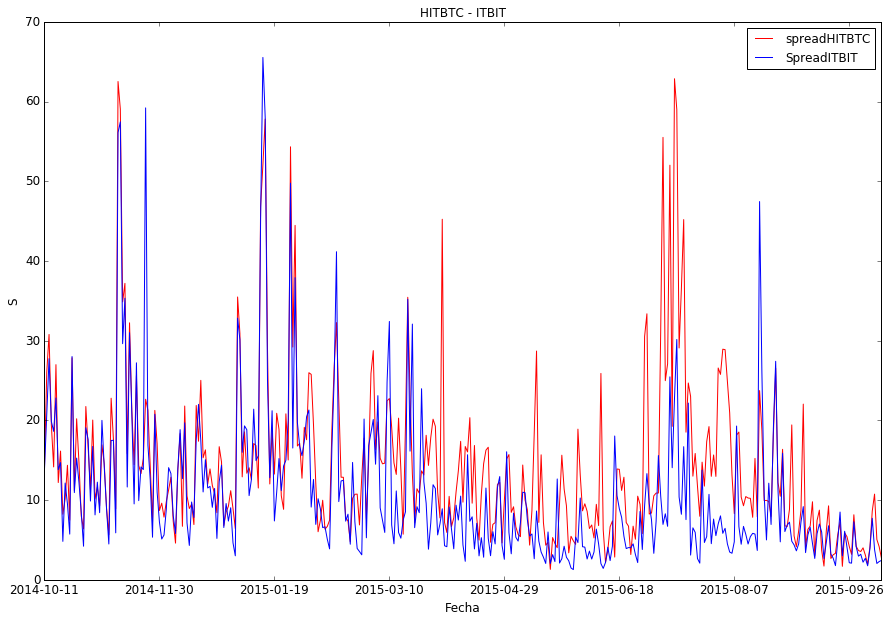

In [39]:
# Graficar los Spread, comparativos
ax = dfFIN[['spreadHITBTC','SpreadITBIT']].plot(kind='line', title ="HITBTC - ITBIT", color=["red","blue"], figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
ax.set_ylabel("S",fontsize=12)
plt.show()

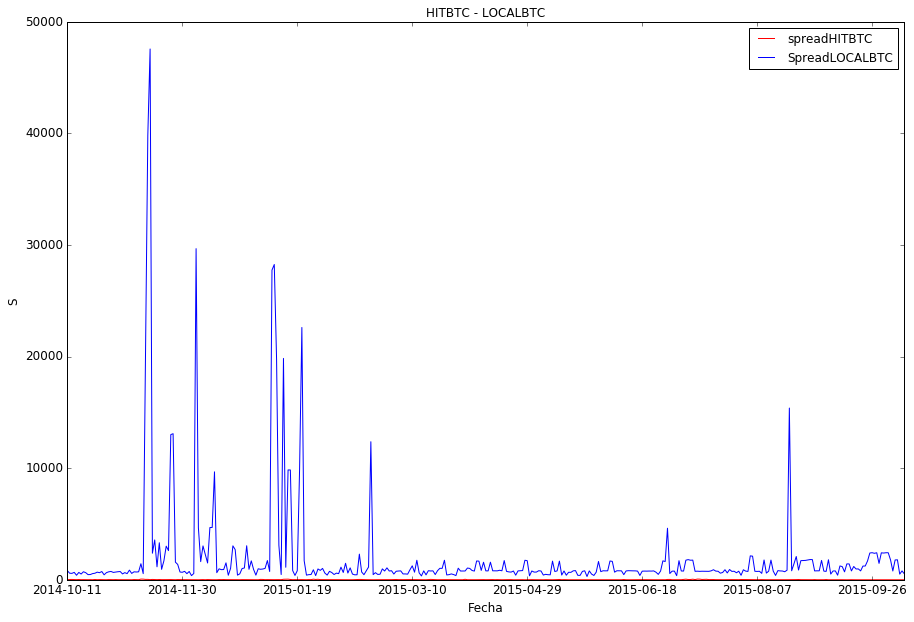

In [40]:
# Graficar los Spread, comparativos
ax = dfFIN[['spreadHITBTC','SpreadLOCALBTC']].plot(kind='line', title ="HITBTC - LOCALBTC",color=["red","blue"],figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
ax.set_ylabel("S",fontsize=12)
plt.show()

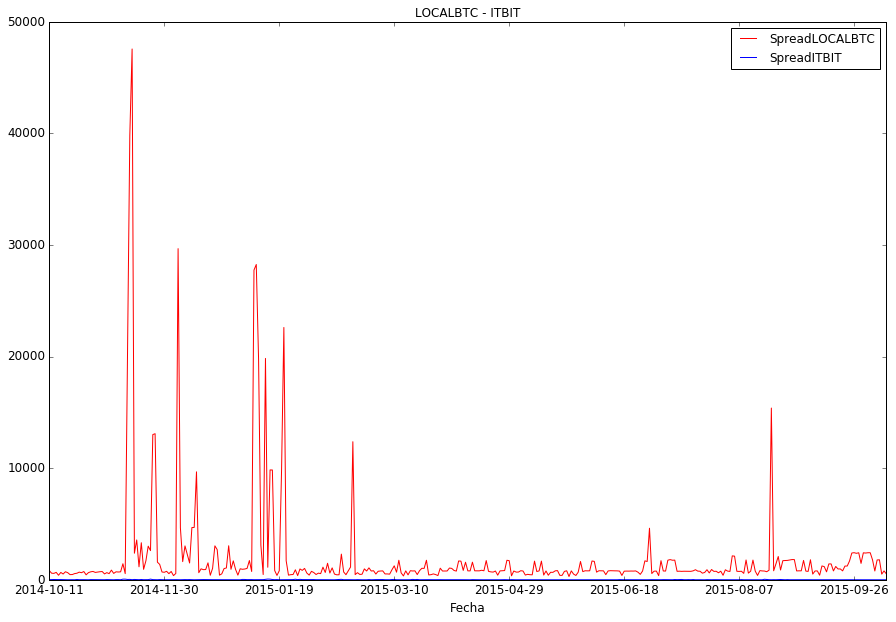

In [41]:
# Graficar los Spread, comparativos
ax = dfFIN[['SpreadLOCALBTC','SpreadITBIT']].plot(kind='line', title ="LOCALBTC - ITBIT", color=["red","blue"], figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
plt.show()
                                  